# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
ls

CONTRIBUTING.md    PDF_lab.ipynb      index_files/
LICENSE.md         README.md          weight-height.csv


In [19]:
data = pd.read_csv("weight-height.csv")
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']
print("Male\n", male_df.describe(),"\nFemale\n", female_df.describe())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male
             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699 
Female
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

In [21]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
# Your code here
import seaborn as sns
sns.set()
plt.style.use('ggplot')

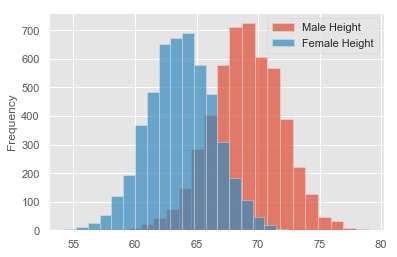

In [83]:
male_df.Height.plot.hist(bins = 20, alpha = 0.7, label = "Male Height")
female_df.Height.plot.hist(bins = 20, alpha = 0.7, label = "Female Height")
plt.legend()

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [84]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    ##Notice that the length of n and bins are not the same -- n stands for an array of histogram
    ##values while bins represent the x-value on the edges. 
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


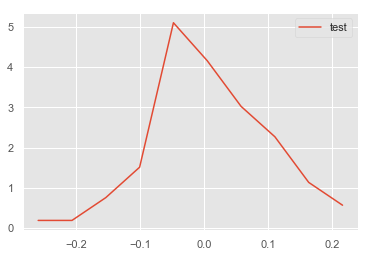

In [85]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

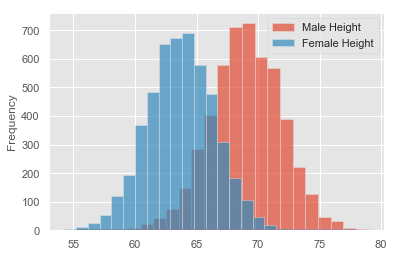

In [86]:
male_df.Height.plot.hist(bins = 20, alpha = 0.7, label = "Male Height")
female_df.Height.plot.hist(bins = 20, alpha = 0.7, label = "Female Height")
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat above exerice for male and female weights

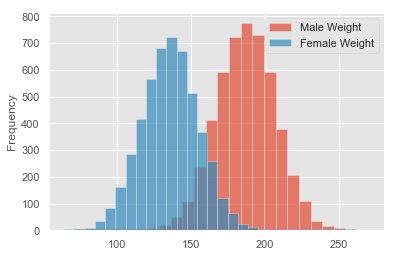

In [87]:
male_df.Weight.plot.hist(bins = 20, alpha = 0.7, label = "Male Weight")
female_df.Weight.plot.hist(bins = 20, alpha = 0.7, label = "Female Weight")
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Repeat Above experiments in seaborn and compare with your results

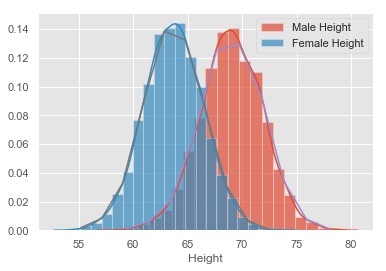

In [72]:
sns.distplot(male_df.Height, bins = 20, hist = True, hist_kws = {"alpha": 0.7}, label = 'Male Height')
sns.distplot(female_df.Height, bins = 20, hist = True, hist_kws = {"alpha": 0.7}, label = 'Female Height')
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

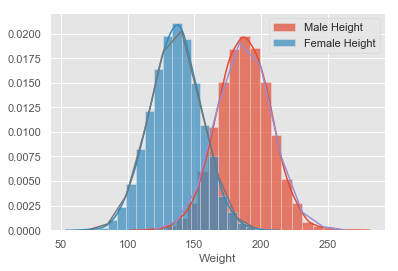

In [74]:
sns.distplot(male_df.Weight, bins = 20, hist = True, hist_kws = {"alpha": 0.7}, label = 'Male Height')
sns.distplot(female_df.Weight, bins = 20, hist = True, hist_kws = {"alpha": 0.7}, label = 'Female Height')
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.